<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/1_EDA_Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry within <h4>(Europe)</h4>Region
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:
- Create a summary page (via [README.md](README.md)) capturing your findings.
- Share this project via GitHub & LinkedIn.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on Europe Data Analyst roles, but you can adapt to any of the following:



## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter data within europe

⚠️ Some countries like Turkey, Russia, Kazakhstan, Armenia, Georgia, and Azerbaijan are transcontinental (partly in Asia and Europe), so include/exclude them based on your definition of "Europe".

In [2]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
    "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland",
    "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia",
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
    "Vatican City"
]

In [3]:
df_european = df[df['job_country'].isin(european_countries)]

## <h4> Drop the duplicate choosing the subset of job_title, job_posted_date, and company_name</h4>
As the same company same date with same job_title_short are considered as a duplicate values

In [4]:
df_european_cleaned = df_european.drop_duplicates(subset=['job_title', 'job_posted_date', 'company_name'])

#### Copy the cleaned datasets in a another name to save its authinticity

In [5]:
df_european_cleaned_copy = df_european_cleaned.copy()

#### Checking the missing values

In [6]:
df_european_cleaned_copy.isnull().sum()

job_title_short               0
job_title                     0
job_location                 14
job_via                       0
job_schedule_type          2290
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_rate              288971
salary_year_avg          289078
salary_hour_avg          291201
company_name                  9
job_skills                45805
job_type_skills           45805
dtype: int64

#### There is 289078 number of missing value within the 'salary_year_avg' column. That's a lot of value. Now the best way to fill these missing value is to see the mean, median, std, min, max over different data jobs and fill these values  with corrosponding median value. 

In [7]:
data_salary_grouped = df_european_cleaned_copy.groupby('job_title_short')['salary_year_avg'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

data_salary_grouped

,job_title_short,mean,median,std,min,max
0,Business Analyst,77996.538462,80850.0,28384.399557,29900.0,185000.0
1,Cloud Engineer,104806.840000,89100.0,57476.662207,56700.0,280000.0
2,Data Analyst,90862.002988,89100.0,37038.420741,30000.0,400000.0
3,Data Engineer,116092.069869,110000.0,34760.000261,35000.0,249000.0
4,Data Scientist,112172.506039,105300.0,41632.025500,33488.5,320000.0
5,Machine Learning Engineer,112688.254630,89100.0,44091.102024,43200.0,225000.0
6,Senior Data Analyst,105740.658537,111175.0,21598.682237,49566.5,194500.0
7,Senior Data Engineer,130071.592199,147500.0,31550.604828,45000.0,176500.0
8,Senior Data Scientist,131360.142336,157500.0,38371.032904,45000.0,224500.0
9,Software Engineer,98955.630435,89100.0,47320.101346,33455.0,320000.0


In [8]:
# Now fill these missing values with the median salary for each job title
def fill_missing_salaries(row):
    if pd.isna(row['salary_year_avg']):
        median_salary = data_salary_grouped.loc[data_salary_grouped['job_title_short'] == row['job_title_short'], 'median'].values[0]
        return median_salary
    return row['salary_year_avg']
df_european_cleaned_copy.loc[:, 'salary_year_avg'] = df_european_cleaned_copy.apply(fill_missing_salaries, axis=1)

In [10]:
## See the results
df_european_cleaned_copy

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,110000.0,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,110000.0,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,80850.0,NaN,Hempel,"[excel, powerpoint, power bi]","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
10,Data Engineer,Erfahrene*r Data Engineer*in (m/w/d),"Basel, Switzerland",via LinkedIn,Full-time,False,Switzerland,2023-04-17 13:27:32,True,False,Switzerland,None,110000.0,NaN,ROCKEN®,"[python, databricks, azure, spark]","{'cloud': ['databricks', 'azure'], 'libraries'..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,89100.0,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,110000.0,NaN,IU Internationale Hochschule,None,None
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,110000.0,NaN,Heidelberg Materials,"[python, c#, java, scala, sql, postgresql, sql...","{'cloud': ['azure', 'databricks'], 'databases'..."
785734,Business Analyst,PreSales Engineer,"Almaty, Kazakhstan",melalui Melga,Pekerjaan tetap,False,Kazakhstan,2023-03-12 06:31:13,False,False,Kazakhstan,None,80850.0,NaN,Staff-UP Consulting Group,[windows],{'os': ['windows']}
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,147500.0,NaN,Pure App,"[sql, python, bigquery, aws, airflow, fastapi,...","{'cloud': ['bigquery', 'aws'], 'libraries': ['..."


#### It is clear that the data is now cleaned and ready for further analysis. The missing salary values have been filled with the median salary for each job title, ensuring that the dataset is complete for analysis.

##### Save the cleaned data as csv for further use

In [12]:
df_european_cleaned_copy.to_csv('df_european_cleaned_copy.csv', index=False)

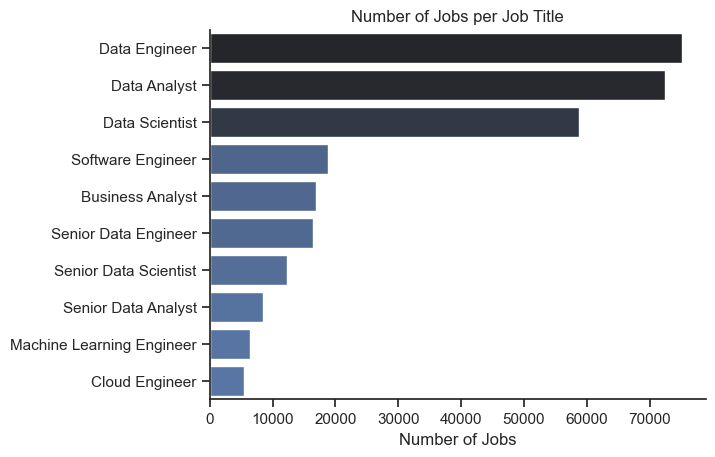

In [13]:
df_plot = df_european_cleaned_copy['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries to Explore

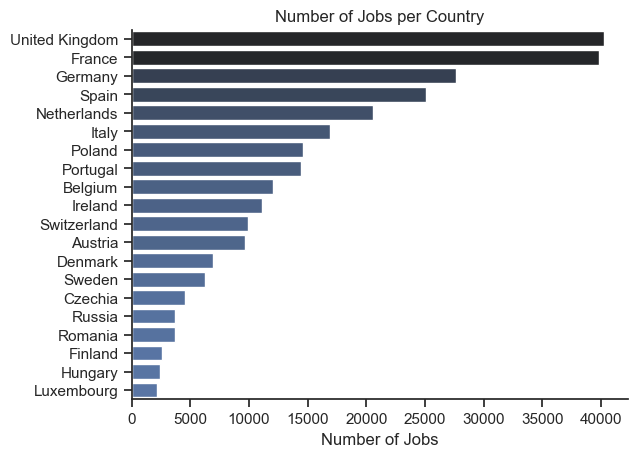

In [14]:
df_plot = df_european_cleaned_copy['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Companies to Explore

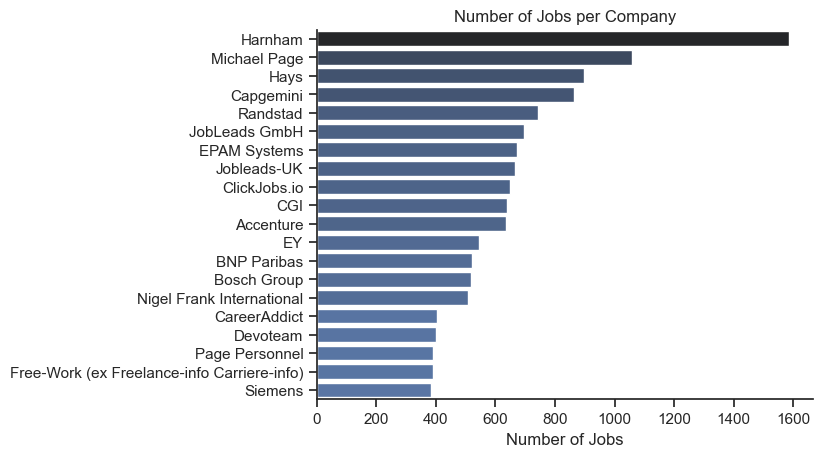

In [15]:
df_plot = df_european_cleaned_copy['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

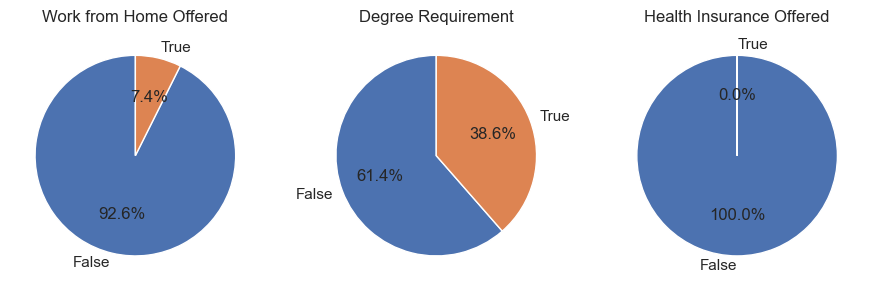

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_european_cleaned_copy[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

## Exploratory Data Analysis for Data Analysts in the Europe

### Filter for US Data Analyst roles

In [17]:
df_european_cleaned_DA = df_european_cleaned_copy[df_european_cleaned['job_title_short'] == "Data Analyst"]

### Locations to Explore:

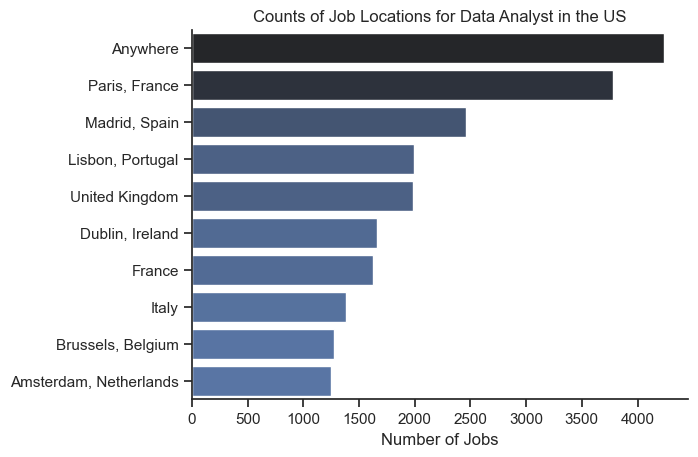

In [18]:
df_plot = df_european_cleaned_DA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

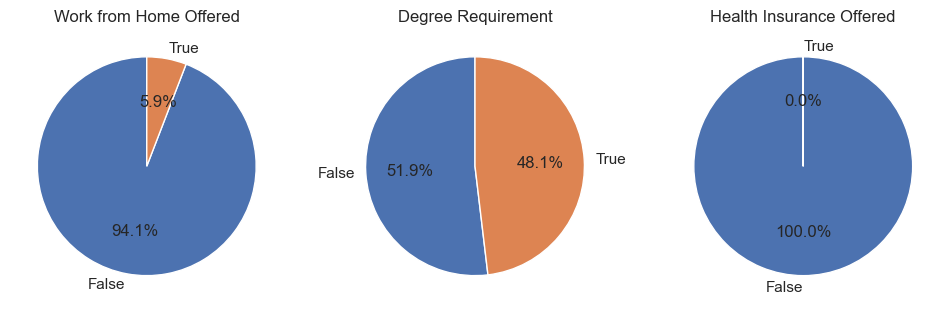

In [19]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_european_cleaned_DA[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

### Companies to Explore:

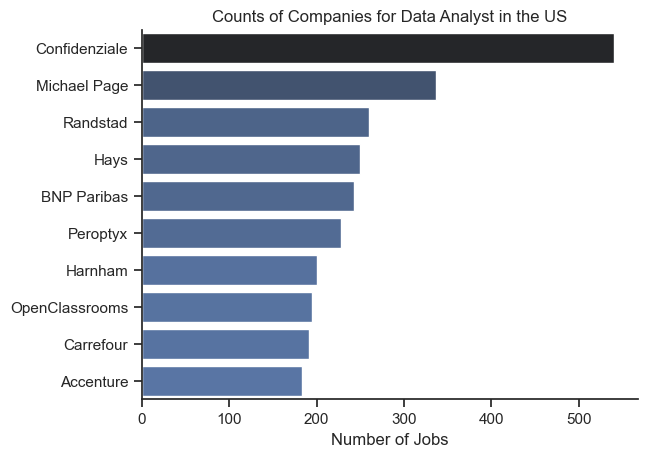

In [20]:
df_plot = df_european_cleaned_DA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()